In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle

In [2]:
boston = load_boston()

C:\Users\athar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["Price"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [10]:
data.shape

(506, 14)

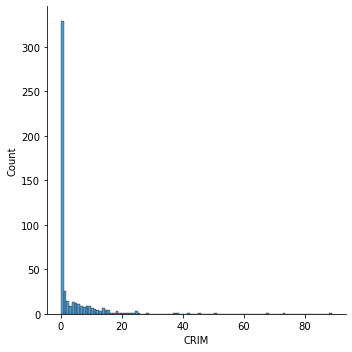

In [11]:
sns.displot(data["CRIM"]);

In [12]:
len(data[data["CRIM"]>30])

8

In [13]:
data = data[data["CRIM"]<30]
data.shape

(498, 14)

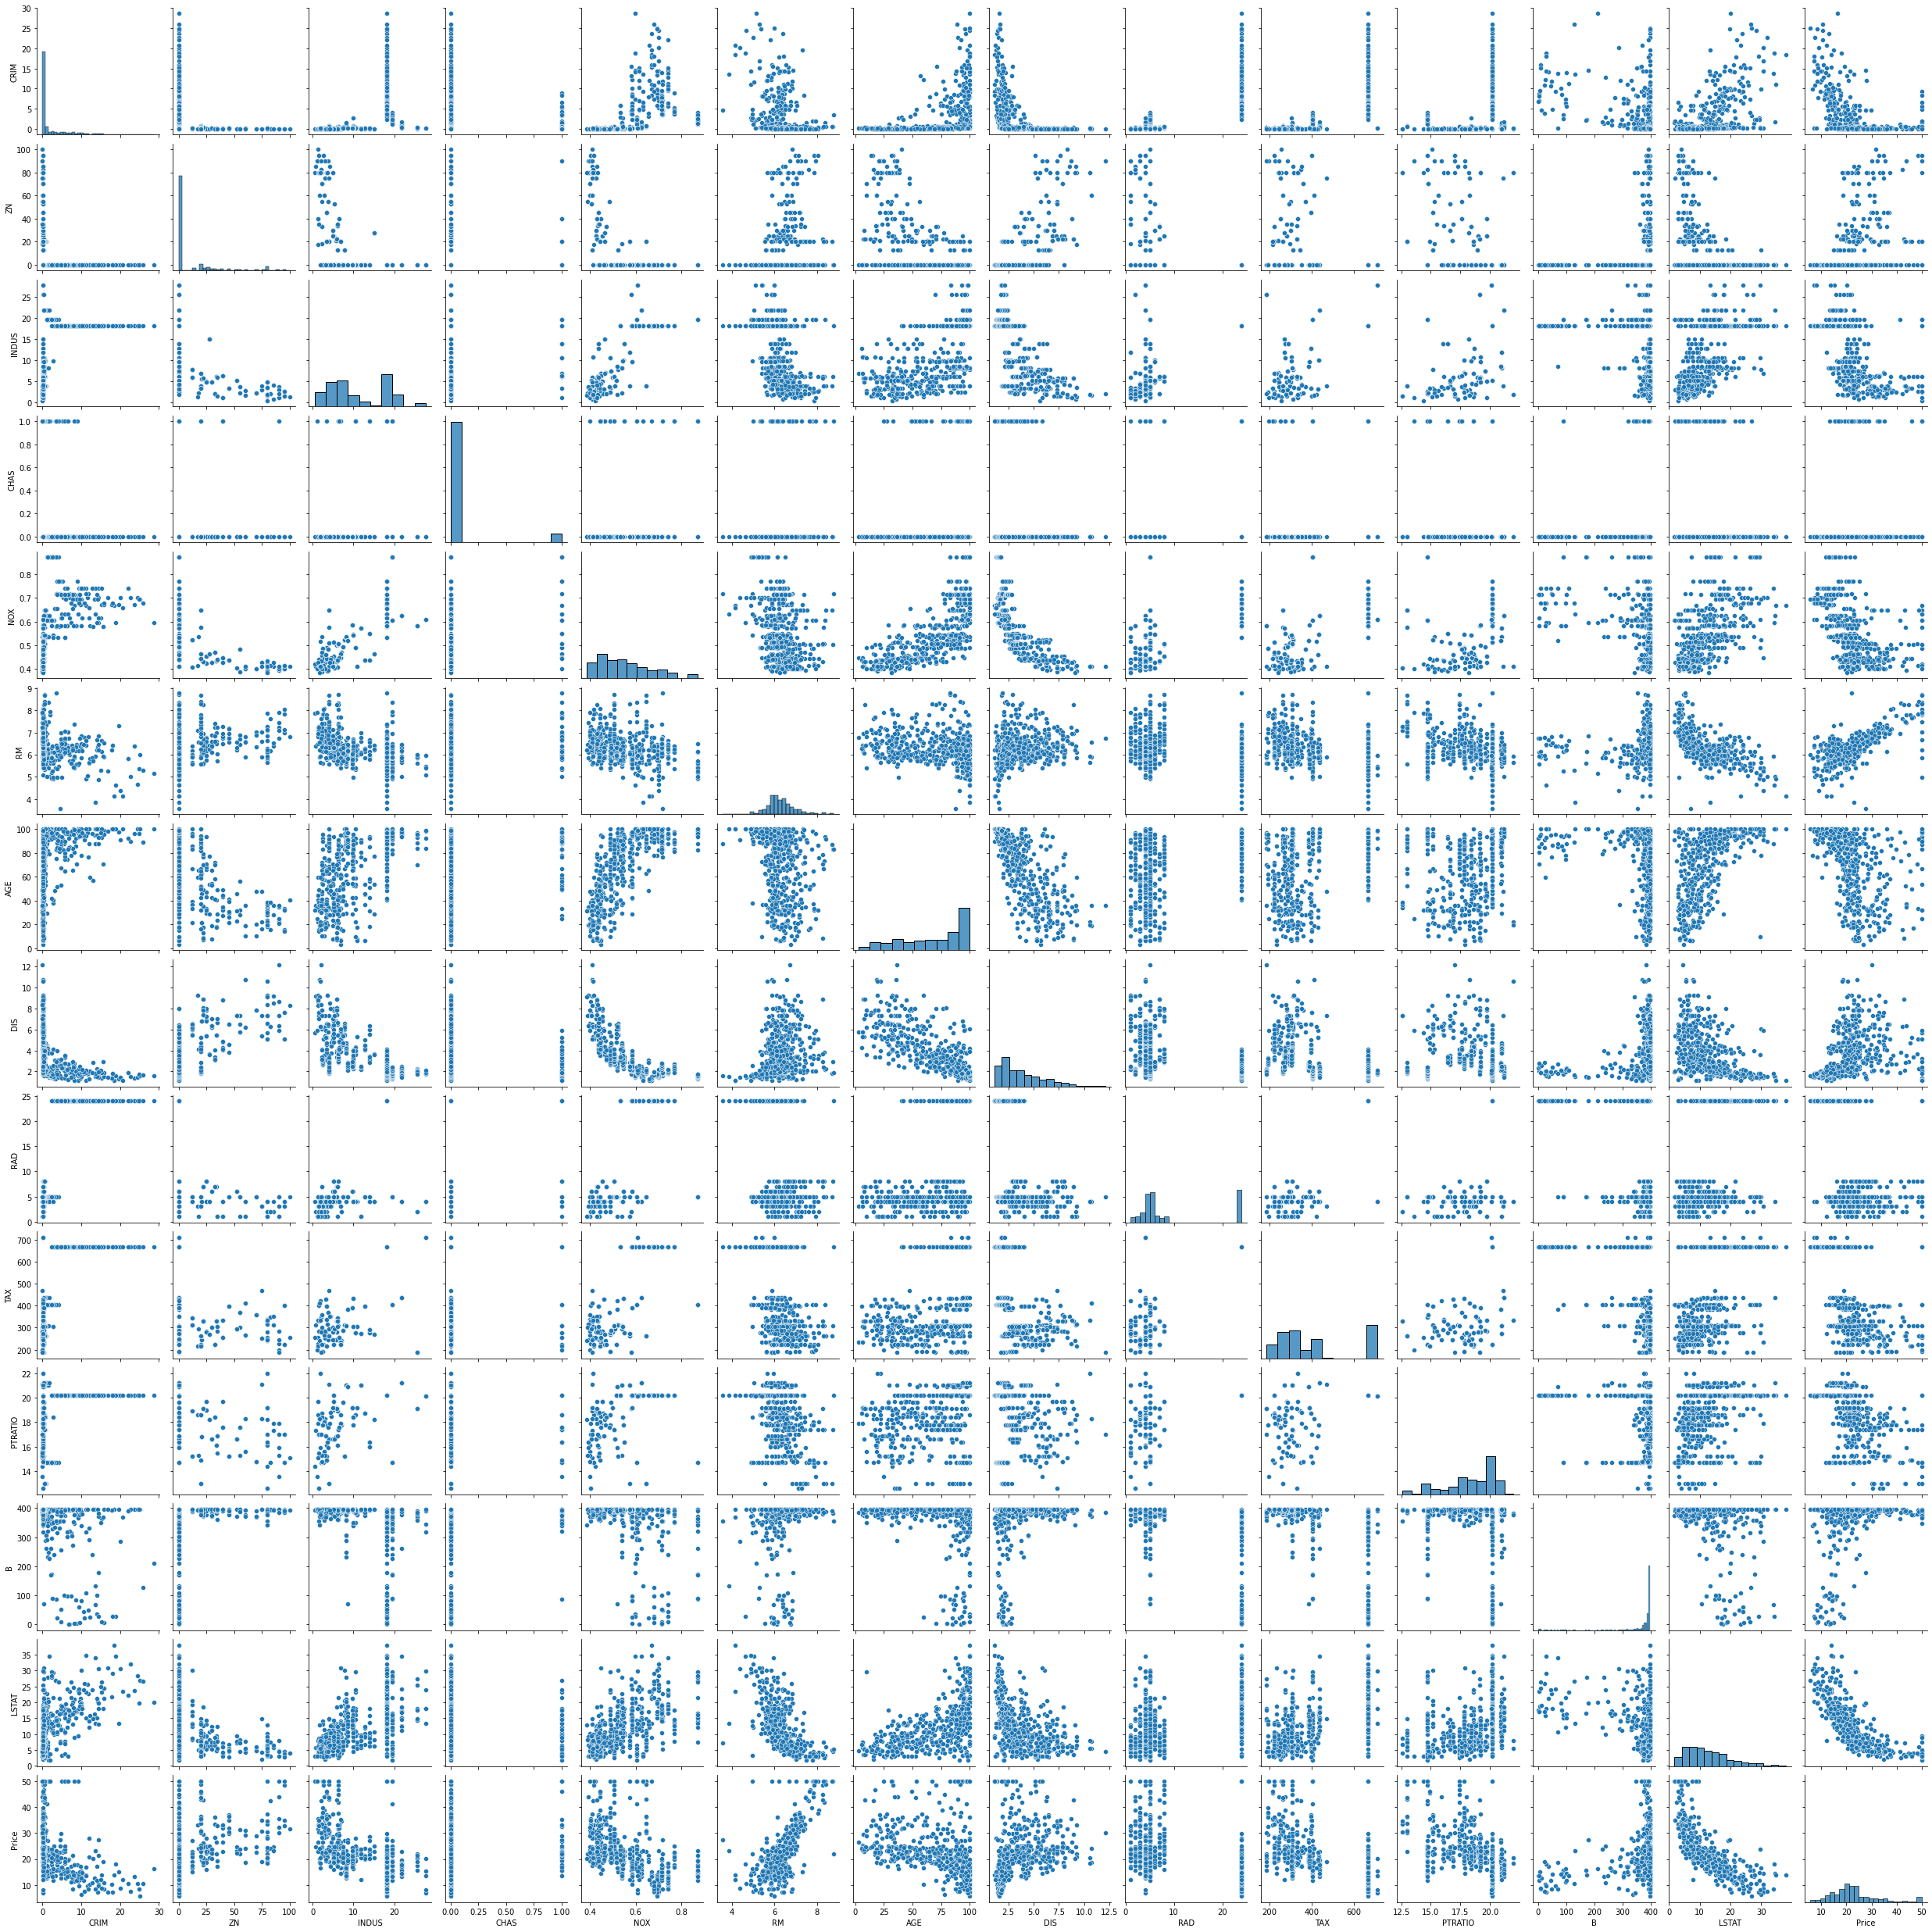

In [14]:
sns.pairplot(data);

In [15]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

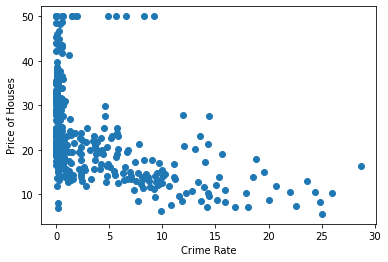

In [16]:
plt.scatter(data["CRIM"],data["Price"]);
plt.xlabel("Crime Rate");
plt.ylabel("Price of Houses");

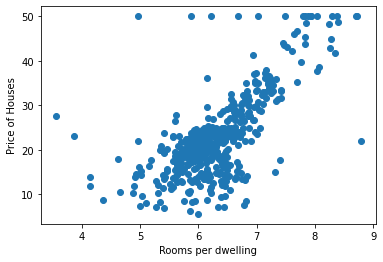

In [17]:
plt.scatter(data["RM"], data["Price"]);
plt.xlabel("Rooms per dwelling");
plt.ylabel("Price of Houses");

C:\Users\athar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


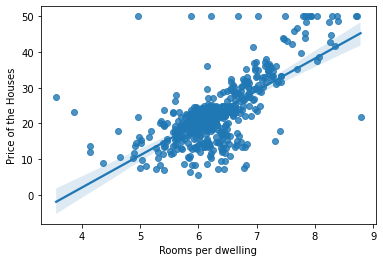

In [18]:
sns.regplot(data["RM"],data["Price"]);
plt.xlabel("Rooms per dwelling");
plt.ylabel("Price of the Houses");

C:\Users\athar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


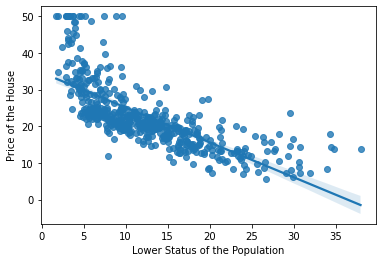

In [19]:
sns.regplot(data["LSTAT"],data["Price"]);
plt.xlabel("Lower Status of the Population");
plt.ylabel("Price of the House");

C:\Users\athar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


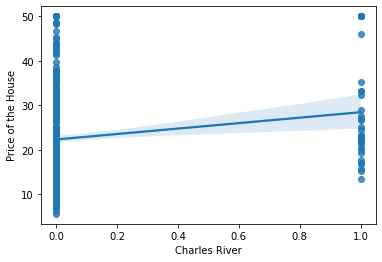

In [20]:
sns.regplot(data["CHAS"], data["Price"]);
plt.xlabel("Charles River");
plt.ylabel("Price of the House");

C:\Users\athar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


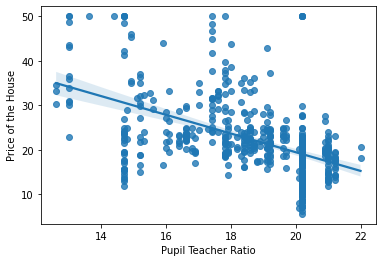

In [21]:
sns.regplot(data["PTRATIO"], data["Price"]);
plt.xlabel("Pupil Teacher Ratio");
plt.ylabel("Price of the House");

In [22]:
X = data.drop(['Price'],axis =1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y = data["Price"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [24]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(398, 13)

In [26]:
X_test.shape

(100, 13)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-0.55360293,  3.06816973, -1.49521051, ..., -0.48932442,
         0.42813442, -0.94956428],
       [-0.47715566, -0.49063785, -0.70041874, ..., -0.44353295,
         0.12486689, -0.86492484],
       [-0.55063151,  0.34672864, -1.1181939 , ..., -1.58831967,
         0.31095732, -1.2379122 ],
       ...,
       [-0.5546838 ,  2.85882811, -1.31034136, ..., -0.62669882,
         0.35531111, -0.91800381],
       [ 1.38689106, -0.49063785,  1.03181971, ...,  0.83862818,
         0.30387049,  0.9268491 ],
       [-0.51298051, -0.49063785, -0.35688238, ...,  1.15916847,
        -3.55637579, -0.25236481]])

In [29]:
X_test

array([[-0.52269079, -0.49063785, -0.19239251, ...,  0.38071349,
         0.384025  ,  0.74752825],
       [-0.5194911 , -0.49063785, -0.0293583 , ...,  0.38071349,
         0.18705995, -0.69564595],
       [-0.46728735, -0.49063785, -0.70041874, ..., -0.44353295,
         0.17447471, -1.02416175],
       ...,
       [-0.41600644, -0.49063785, -0.41802021, ...,  1.20495994,
         0.3554333 , -0.15911797],
       [-0.52218352, -0.49063785, -0.52865056, ...,  0.56387937,
         0.42813442, -0.79176193],
       [-0.54781227,  0.97475351, -0.72079802, ..., -0.67249029,
         0.39294463,  0.00585721]])

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
reg.coef_

array([-0.69777372,  0.71757089,  0.18462303,  0.56788148, -1.96091569,
        2.75683594, -0.16434321, -3.07188267,  2.29205785, -1.63116363,
       -2.19926354,  0.9547795 , -3.85971478])

In [32]:
reg.intercept_

22.987437185929647

In [33]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
reg.score(X_test, y_test)

0.7564786813945177

In [35]:
y_pred = reg.predict(X_test)

C:\Users\athar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


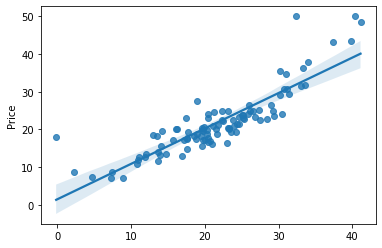

In [36]:
sns.regplot(y_pred,y_test);

In [37]:
residuals = y_test - y_pred
residuals

495    5.696072
73    -1.299296
231   -1.827505
175   -2.004075
237   -1.549567
         ...   
247    0.922923
384    6.544653
19    -0.344176
321   -2.115394
331   -2.979116
Name: Price, Length: 100, dtype: float64

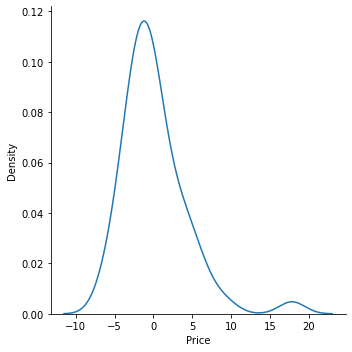

In [38]:
sns.displot(residuals, kind='kde');

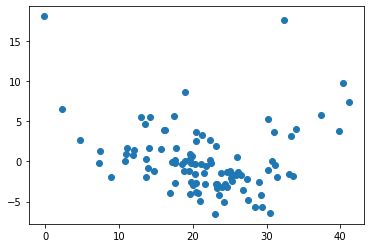

In [39]:
plt.scatter(y_pred,residuals);

In [40]:
print("Mean Absoulute Error: ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absoulute Error:  2.925203659912955
Mean Squared Error:  17.185835200889823
Root Mean Squared Error:  4.145580200754754


In [41]:
r2_score(y_test, y_pred)

0.7564786813945177

In [42]:
test = boston.data[0].reshape(1,-1)
test

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [43]:
test = scaler.transform(test)
test

C:\Users\athar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.55637925,  0.26299199, -1.26667148, -0.29063493, -0.14103414,
         0.36547461, -0.1278684 ,  0.13455137, -0.97720561, -0.64658094,
        -1.40515379,  0.42813442, -1.06289505]])

In [44]:
pickle.dump(reg,open('regmodel.pkl','wb'))
model = pickle.load(open('regmodel.pkl','rb'))

In [45]:
model.predict(test)

array([30.47369114])